In [17]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [18]:
df = pd.read_csv("../data/selected_M_best50.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1657898  ILMN_1660357  \
0        9.3790       13.1600        9.1206        8.9263        9.5279   
1        9.3431       13.6183        9.6620        8.6274        9.5668   
2        8.7567       12.5893        8.9047        8.3385        8.6186   
3        8.7806       12.4219        8.7785        8.2053        8.4064   
4        8.5279       12.0954        8.4493        8.2168        8.4192   

   ILMN_1667500  ILMN_1670218  ILMN_1670638  ILMN_1671005  ILMN_1677756  ...  \
0        8.4448       11.3745       11.0382       11.4310        9.9916  ...   
1        8.3387       11.7645       11.4380       12.1278       10.5783  ...   
2        8.0199       10.2609        9.5454       10.5202        9.3776  ...   
3        8.0968       10.1913        9.4288       10.2085        8.4853  ...   
4        8.1602       10.0457        9.3820       10.1140        8.5531  ...   

   ILMN_1805111  ILMN_1812970  ILMN_1852793  ILMN_1875248  ILMN_2082

In [19]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [20]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1657898  ILMN_1660357  \
0        9.3790       13.1600        9.1206        8.9263        9.5279   
1        9.3431       13.6183        9.6620        8.6274        9.5668   
2        8.7567       12.5893        8.9047        8.3385        8.6186   
3        8.7806       12.4219        8.7785        8.2053        8.4064   
4        8.5279       12.0954        8.4493        8.2168        8.4192   

   ILMN_1667500  ILMN_1670218  ILMN_1670638  ILMN_1671005  ILMN_1677756  ...  \
0        8.4448       11.3745       11.0382       11.4310        9.9916  ...   
1        8.3387       11.7645       11.4380       12.1278       10.5783  ...   
2        8.0199       10.2609        9.5454       10.5202        9.3776  ...   
3        8.0968       10.1913        9.4288       10.2085        8.4853  ...   
4        8.1602       10.0457        9.3820       10.1140        8.5531  ...   

   ILMN_1805111  ILMN_1812970  ILMN_1852793  ILMN_1875248  ILMN_2082

In [21]:

df.describe()

,ILMN_1651296,ILMN_1654609,ILMN_1655864,ILMN_1657898,ILMN_1660357,ILMN_1667500,ILMN_1670218,ILMN_1670638,ILMN_1671005,ILMN_1677756,...,ILMN_1805111,ILMN_1812970,ILMN_1852793,ILMN_1875248,ILMN_2082762,ILMN_2159384,ILMN_2203896,ILMN_2272857,ILMN_2359627,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,8.963658,12.634358,8.840350,8.361906,8.984964,8.240606,10.621906,10.079049,10.812333,9.293271,...,8.303556,8.365388,10.993503,8.377289,10.579364,9.127508,9.943714,8.906776,8.425519,0.707143
std,0.507967,0.787855,0.551345,0.348476,0.548652,0.238972,0.829364,0.666381,0.782629,0.642800,...,0.321369,0.479864,0.903003,0.385426,0.766060,0.610215,0.937709,0.424639,0.383808,0.456707
min,8.172100,9.570600,7.867800,7.708100,8.049400,7.830800,8.247400,8.495100,8.556300,8.120700,...,7.772500,7.618600,9.039600,7.758800,8.692200,7.852400,8.039000,8.108100,7.761100,0.000000
25%,8.595050,12.086050,8.413500,8.128750,8.536025,8.088375,9.999675,9.542500,10.215175,8.837150,...,8.045250,8.018450,10.398425,8.110900,10.006300,8.679300,9.309425,8.607750,8.161925,0.000000
50%,8.837400,12.694350,8.688850,8.254400,8.911400,8.159700,10.624050,10.149200,10.779850,9.161400,...,8.244350,8.155100,10.872250,8.260100,10.407700,9.066750,9.789650,8.758050,8.335400,1.000000
75%,9.262500,13.167725,9.193275,8.539750,9.307150,8.339600,11.230700,10.619300,11.397900,9.810575,...,8.530425,8.649025,11.544025,8.596925,11.145700,9.559950,10.440125,9.234700,8.562700,1.000000
max,10.410700,13.997800,10.372400,9.626600,10.658800,9.235600,12.168300,11.499200,12.475300,11.004100,...,9.153700,9.860400,13.282500,9.530000,12.434900,10.433700,13.061800,10.149800,9.909400,1.000000


In [22]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['ILMN_1651296', 'ILMN_1654609', 'ILMN_1655864', 'ILMN_1657898', 'ILMN_1660357', 'ILMN_1667500', 'ILMN_1670218', 'ILMN_1670638', 'ILMN_1671005', 'ILMN_1677756', 'ILMN_1679045', 'ILMN_1687526', 'ILMN_1693635', 'ILMN_1698404', 'ILMN_1701962', 'ILMN_1704335', 'ILMN_1706859', 'ILMN_1707631', 'ILMN_1713189', 'ILMN_1713764', 'ILMN_1715771', 'ILMN_1725707', 'ILMN_1729832', 'ILMN_1732141', 'ILMN_1740875', 'ILMN_1745788', 'ILMN_1755643', 'ILMN_1755911', 'ILMN_1758687', 'ILMN_1762080', 'ILMN_1763364', 'ILMN_1765725', 'ILMN_1767168', 'ILMN_1768391', 'ILMN_1772796', 'ILMN_1775304', 'ILMN_1780334', 'ILMN_1785732', 'ILMN_1794233', 'ILMN_1798706', 'ILMN_1804988', 'ILMN_1805111', 'ILMN_1812970', 'ILMN_1852793', 'ILMN_1875248', 'ILMN_2082762', 'ILMN_2159384', 'ILMN_2203896', 'ILMN_2272857', 'ILMN_2359627', 'Results']
51


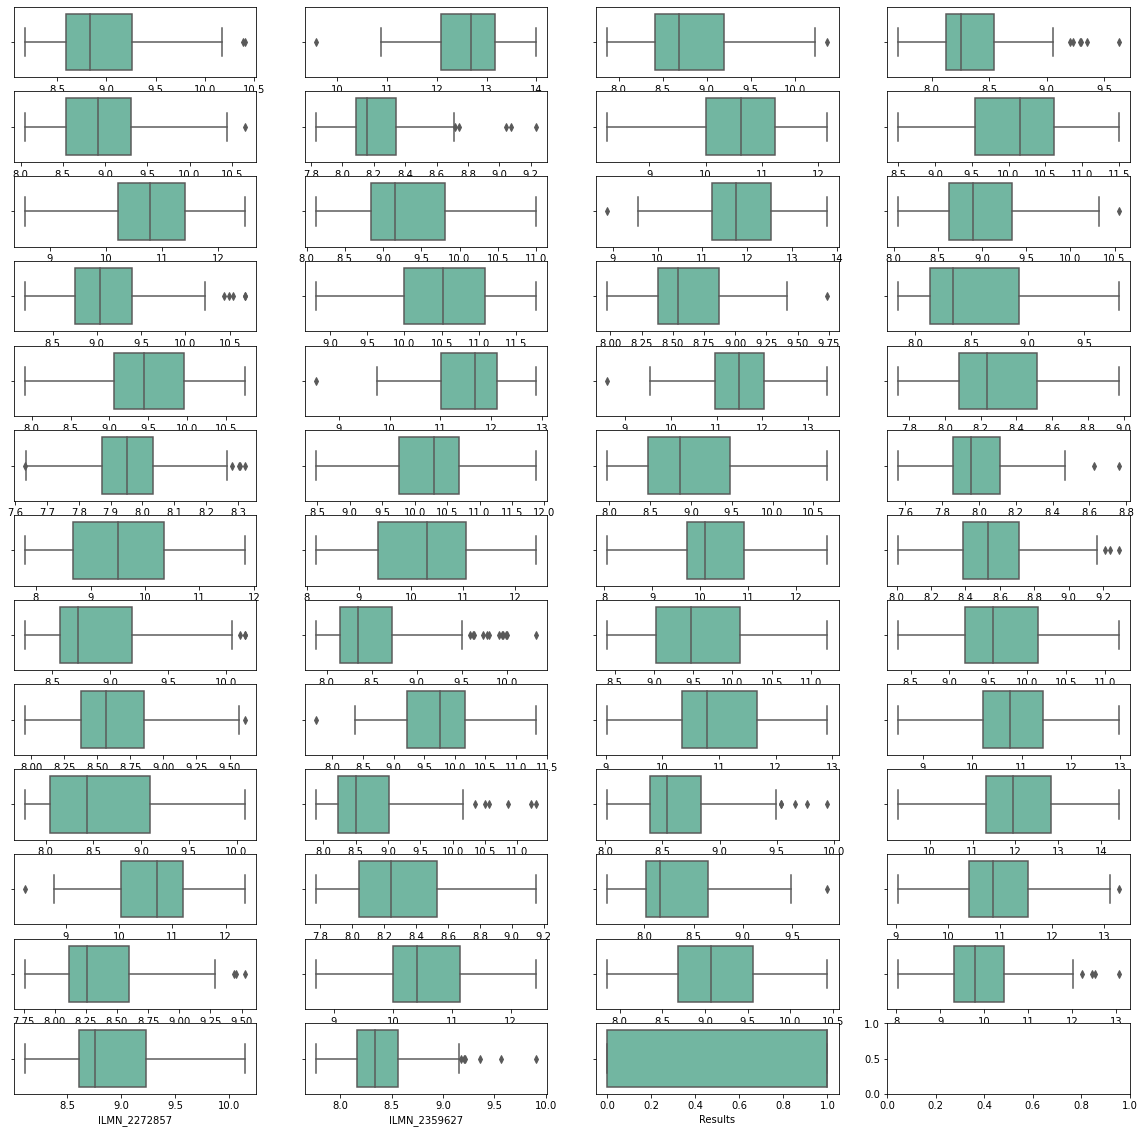

In [23]:
fig, axes = plt.subplots(13,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11: 
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    elif i == 19:
        x_ = 5
        y_ = 0
    elif i == 23:
        x_ = 6
        y_ = 0 
    elif i == 27:
        x_ = 7
        y_ = 0
    elif i == 31: 
        x_ = 8
        y_ = 0
    elif i == 35:
        x_ = 9
        y_ = 0
    elif i == 39: 
        x_ = 10
        y_ = 0
    elif i == 43:
        x_ = 11
        y_ = 0
    elif i == 47:
        x_ = 12
        y_ = 0

    else:
        y_ += 1

In [24]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['ILMN_1651296', 'ILMN_1654609', 'ILMN_1655864', 'ILMN_1657898',
       'ILMN_1660357', 'ILMN_1667500', 'ILMN_1670218', 'ILMN_1670638',
       'ILMN_1671005', 'ILMN_1677756', 'ILMN_1679045', 'ILMN_1687526',
       'ILMN_1693635', 'ILMN_1698404', 'ILMN_1701962', 'ILMN_1704335',
       'ILMN_1706859', 'ILMN_1707631', 'ILMN_1713189', 'ILMN_1713764',
       'ILMN_1715771', 'ILMN_1725707', 'ILMN_1729832', 'ILMN_1732141',
       'ILMN_1740875', 'ILMN_1745788', 'ILMN_1755643', 'ILMN_1755911',
       'ILMN_1758687', 'ILMN_1762080', 'ILMN_1763364', 'ILMN_1765725',
       'ILMN_1767168', 'ILMN_1768391', 'ILMN_1772796', 'ILMN_1775304',
       'ILMN_1780334', 'ILMN_1785732', 'ILMN_1794233', 'ILMN_1798706',
       'ILMN_1804988', 'ILMN_1805111', 'ILMN_1812970', 'ILMN_1852793',
       'ILMN_1875248', 'ILMN_2082762', 'ILMN_2159384', 'ILMN_2203896',
       'ILMN_2272857', 'ILMN_2359627', 'Results'],
      dtype='object')
   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1657898  ILMN_1660357  \


In [25]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

1    99
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

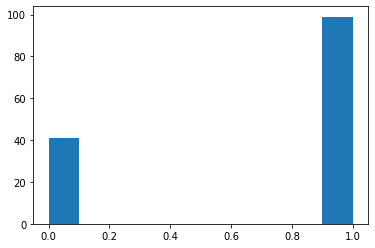

In [26]:
plt.hist(y)

1    58
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

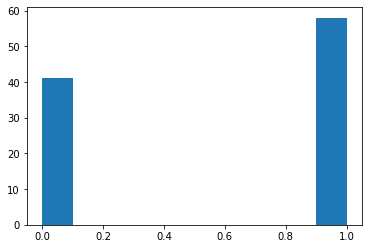

In [27]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    58
1    58
Name: Results, dtype: int64


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

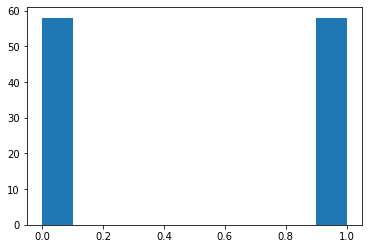

In [28]:
smt = SMOTE()
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [29]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  87.931
Standed deviation :  3.448
CV value :  3
Parameters :  {}
Accuracy :  93.095
Standed deviation :  5.281
CV value :  4
Parameters :  {}
Accuracy :  85.345
Standed deviation :  10.452
CV value :  5
Parameters :  {}
Accuracy :  89.601
Standed deviation :  6.541


In [30]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 1}
Accuracy :  89.655
Standed deviation :  6.897
CV value :  3
Parameters :  {'random_state': 50}
Accuracy :  89.586
Standed deviation :  5.758
CV value :  4
Parameters :  {'random_state': 1}
Accuracy :  87.931
Standed deviation :  8.959
CV value :  5
Parameters :  {'random_state': 1}
Accuracy :  90.435
Standed deviation :  9.284


In [31]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 5}
Accuracy :  94.828
Standed deviation :  3.448
CV value :  3
Parameters :  {'n_neighbors': 3}
Accuracy :  93.905
Standed deviation :  5.415
CV value :  4
Parameters :  {'n_neighbors': 3}
Accuracy :  93.966
Standed deviation :  5.100
CV value :  5
Parameters :  {'n_neighbors': 3}
Accuracy :  93.913
Standed deviation :  5.217


In [32]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  88.793
Standed deviation :  2.586
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  90.508
Standed deviation :  1.277
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  89.655
Standed deviation :  4.877
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  89.674
Standed deviation :  5.167


In [33]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  93.103
Standed deviation :  3.448
CV value :  3
Parameters :  {}
Accuracy :  93.050
Standed deviation :  4.513
CV value :  4
Parameters :  {}
Accuracy :  91.379
Standed deviation :  3.855
CV value :  5
Parameters :  {}
Accuracy :  92.246
Standed deviation :  4.248


In [34]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'linear'}
Accuracy :  90.517
Standed deviation :  0.862
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  88.776
Standed deviation :  2.501
CV value :  4
Parameters :  {'kernel': 'rbf'}
Accuracy :  90.517
Standed deviation :  4.479
CV value :  5
Parameters :  {'kernel': 'rbf'}
Accuracy :  91.377
Standed deviation :  4.765


In [36]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}
cv_array = [2,3,4,5,6,7,8]
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 300}
Accuracy :  95.690
Standed deviation :  2.586
CV value :  3
Parameters :  {'max_depth': 80, 'max_features': 4, 'n_estimators': 200}
Accuracy :  95.659
Standed deviation :  3.271
CV value :  4
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 300}
Accuracy :  93.966
Standed deviation :  5.100
CV value :  5
Parameters :  {'max_depth': 80, 'max_features': 4, 'n_estimators': 200}
Accuracy :  95.652
Standed deviation :  3.889
CV value :  6
Parameters :  {'max_depth': 300, 'max_features': 2, 'n_estimators': 100}
Accuracy :  94.737
Standed deviation :  7.443
CV value :  7
Parameters :  {'max_depth': 100, 'max_features': 6, 'n_estimators': 200}
Accuracy :  95.641
Standed deviation :  5.355
CV value :  8
Parameters :  {'max_depth': 80, 'max_features': 5, 'n_estimators': 200}
Accuracy :  95.595
Standed deviation :  4.942
